In [ ]:
featureCounts -a /data1/projects/2021_MOPA/bioinfo/binfo1-datapack1/gencode.gtf -o /data1/projects/2021_MOPA/bioinfo/binfo1-datapack1/read-counts.txt /data1/projects/2021_MOPA/bioinfo/binfo1-datapack1/*.bam


In [38]:
import pandas as pd
cnts = pd.read_csv('/data1/projects/2021_MOPA/bioinfo/binfo1-datapack1/read-counts.txt', sep='\t', comment='#', index_col=0)
a=list()
for i in cnts.columns:
    if len(i)>=10:
        i=i.split('/')[-1]
    a.append(i)
cnts.columns=a

In [40]:
threshold =30
cnts = cnts[(cnts['CLIP-35L33G.bam'] >= threshold) &
            (cnts['RNA-control.bam'] >= threshold) &
            (cnts['RNA-siLin28a.bam'] >= threshold) &
            (cnts['RNA-siLuc.bam'] >= threshold) &
            (cnts['RPF-siLuc.bam'] >= threshold)]

In [46]:
cnts.columns[5:13]

Index(['CLIP-35L33G.bam', 'RNA-control.bam', 'RNA-siLin28a.bam',
       'RNA-siLuc.bam', 'RPF-siLin28a.bam', 'RPF-siLuc.bam'],
      dtype='object')

In [47]:
for col in cnts.columns[5:]:
    cnts[col] = (
        cnts[col].astype(float)
        / cnts["Length"].astype(float)
        * 1000
        / sum(cnts[col])
        * 10**6
    )

cnts["clip_enrichment"] = cnts["CLIP-35L33G.bam"] / cnts["RNA-control.bam"]

cnts["rden_change"] = (cnts["RPF-siLin28a.bam"] / cnts["RNA-siLin28a.bam"]) / (
    cnts["RPF-siLuc.bam"] / cnts["RNA-siLuc.bam"]
)

/data1/home/jaeminjj/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


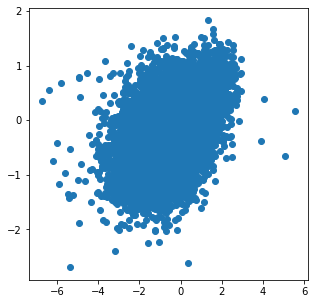

In [48]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

In [50]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


In [51]:
import ssl

In [52]:
a=list()
for i in cnts.index:
    a.append(i.split('.')[0])
cnts.index=a

In [53]:
mouselocal.index=mouselocal.gene_id

In [60]:
final=pd.merge(cnts,mouselocal,left_index=True,right_index=True)
plot=pd.DataFrame(index=range(len(final.index)),columns =['clip_enrichment','rden_change','type'])


In [55]:
import seaborn as sns

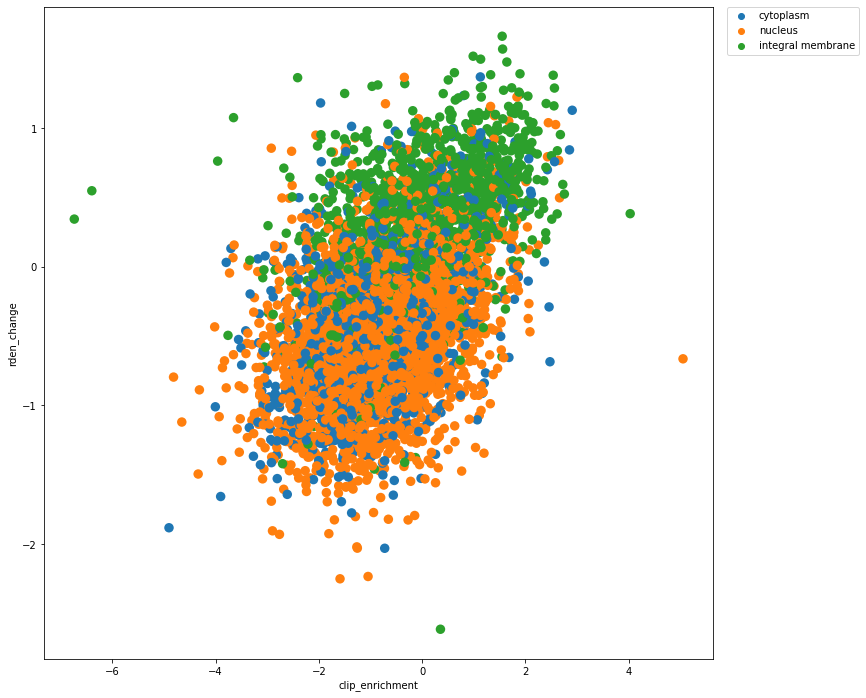

In [64]:
    plot['clip_enrichment']=list(np.log2(final['clip_enrichment']))
    plot['rden_change']=list(np.log2(final['rden_change']))
    plot['type']=list(final['type'].to_list())
    umall=sns.scatterplot(x='clip_enrichment',y='rden_change',hue='type',data=plot,s=90,linewidth=0)
        #umall=sns.scatterplot(x='x',y='y',hue='type',data=plot,s=90,palette=['#F8766D', '#F17CBE', '#7CE88D', '#00BFC4','red'],linewidth=0)
        #umall=sns.scatterplot(x='x',y='y',hue='type',data=plot,s=90,palette=['red','#ff7f0e','#2ca02c','#F25F5C','#247BA0','#70C1B3','#50514F','#628B48'],linewidth=0)
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    umall = umall.get_figure()
    fig_size = (12, 12)
    umall.set_size_inches(fig_size)
    umall.savefig('/data1/projects/2021_MOPA/bioinfo/guide_mission/1.pdf')